# Applications On Derivatives

In [382]:
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [383]:
data=np.loadtxt("data.dat")

In [384]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

## Task

Calculate the velocity $v(t)=x'(t)$ and the acceleration $a(t) = x''(t)$ for the loaded data set that describes $(t_{i},x_{i})$ for $i=0, \dots, 1000$ 

1-calculate $v_{i}$ and $a_{i}$ using the forward-differences, centeral differences and Richardson methods

2-Determine the maximum value of acceleration and corresponding time.

## Solution

In [385]:
def forward(data):
    # the derivative of the last point cannot be calculated using the forward method as there's no f(x+h) at this point
    # So we will calculate the rest of the points normally using the forward method, but the last point will be calcuated
    # using the backward method
    derive = (data[1:,1]-data[:-1,1])/(data[1:,0]-data[:-1,0])
    derive=np.append(derive,(data[-1,1]-data[-2,1])/(data[-1,0]-data[-2,0]))
    return np.transpose([data[:,0],derive])

In [386]:
def centeral(data):
    #last element and first element cannot be calculated using centeral method(f(x+h)-f(x-h)/2h)
    #so we will calculate the first element using forward mehtod,and the last element using backword one.
    derive=(data[1,1]-data[0,1])/(data[1,0]-data[0,0]) # first element
    derive=np.append(derive,(data[2:,1]-data[:-2,1])/((data[2:,0]-data[:-2,0]))) #middle elements
    derive=np.append(derive,(data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])) #last element
    return np.transpose([data[:,0],derive])

In [387]:
def richardson(data):
    # The first 2 elements, and the last 2 elements cannot be calculated using richardson method
    #due to the presence of (f(x-2h) and f(x+2h) respectively)
    #so we will calculate them using forward and backward methods.
    derive=((data[1:3,1]-data[0:2,1])/(data[1:3,0]-data[0:2,0])) #first 2 values using forward method
    derive=np.append(derive,(1/(12*(data[3:-1,0]-data[2:-2,0])))*(data[:-4,1]-8*data[1:-3,1]+8*data[3:-1,1]-data[4:,1]))
    #middle values using richardson
    
    derive=np.append(derive,(data[-2:,1]-data[-3:-1,1])/(data[-2:,0]-data[-3:-1,0])) #last 2 values using backward method
    return np.transpose([data[:,0],derive])

In [388]:
forwardVel=forward(data)
forwardAcc=forward(forwardVel)
centeralVel=centeral(data)
centeralAcc=centeral(centeralVel)
richardsonVel=richardson(data)
richardsonAcc=richardson(richardsonVel)

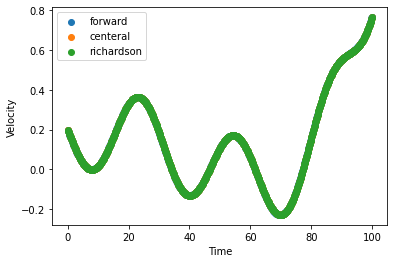

In [389]:
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.scatter(forwardVel[:,0],forwardVel[:,1],label="forward")
plt.scatter(centeralVel[:,0],centeralVel[:,1],label="centeral")
plt.scatter(richardsonVel[:,0],richardsonVel[:,1],label="richardson")
plt.legend()

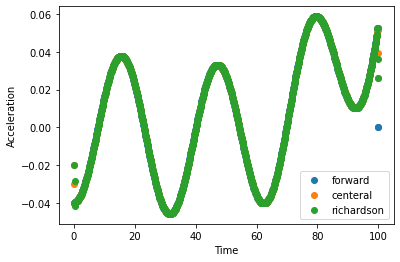

In [394]:
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(forwardAcc[:,0],forwardAcc[:,1],label="forward")
plt.scatter(centeralAcc[:,0],centeralAcc[:,1],label="centeral")
plt.scatter(richardsonAcc[:,0],richardsonAcc[:,1],label="richardson")
plt.legend()

When calculating the acceleraion there's an error in the first and last few points as they were calculated differently compared to other points.

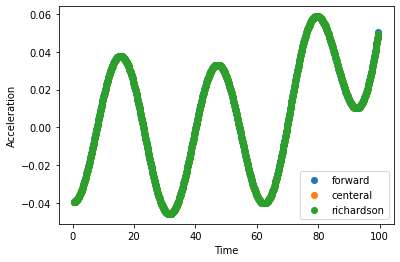

In [396]:
#by neglecting these inaccurate points
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.scatter(forwardAcc[4:-4,0],forwardAcc[4:-4,1],label="forward")
plt.scatter(centeralAcc[4:-4,0],centeralAcc[4:-4,1],label="centeral")
plt.scatter(richardsonAcc[4:-4,0],richardsonAcc[4:-4,1],label="richardson")
plt.legend()

### calculating the maximum acceleration

In [400]:
maxAcc=max(richardsonAcc[:,1])
maxTime=richardsonAcc[np.argmax(richardsonAcc[:,1]),0]
print("Maximum acceleration= ", maxAcc,"m/sec^2")
print("Time when max acceleration occurs=", maxTime,"sec")

Maximum acceleration=  0.058898335802744034 m/sec^2
Time when max acceleration occurs= 79.60000000000001 sec
